## import all required libraries

In [1]:
import pandas as pd
import numpy as np

### loading the dataset

In [2]:
data=pd.read_csv('adult 3.csv')

In [3]:
data.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Handling missing value '?'


In [6]:
data.replace("?",np.nan,inplace=True)

# Identify categorical columns with missing values
categorical_cols_with_nan = ['workclass', 'occupation', 'native-country']

# Impute missing values with the mode of each column
for col in categorical_cols_with_nan:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Verify that there are no more '?' or NaN values
print(data.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_21548\2106563206.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


### Feature Encoding (using OneHot incoding)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features (X) and target (y)
X = data.drop('income', axis=1)
y = data['income']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Identify categorical and numerical columns for encoding
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
                      'hours-per-week']

# Create a column transformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# The transformed data is a sparse matrix. We can convert it to a dense array.
# Depending on the number of features, you might want to keep it sparse for memory efficiency.
# For simplicity, we'll convert it to a dense array here.
X_transformed = X_transformed.toarray()

print(X_transformed.shape)

(48842, 105)


### Train test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (39073, 105)
Testing set size: (9769, 105)


## **Model Training and Selection**

#### Step 1: Import Models and Evaluation Metrics

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

###Step 2: Train and Evaluate Models
We will train four different models: Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting.

In [10]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }
    print(f"{name} metrics:")
    for metric, value in results[name].items():
        print(f"  {metric}: {value:.4f}")

# Find the best model based on a chosen metric (e.g., f1-score)
best_model_name = max(results, key=lambda name: results[name]['f1'])
best_model = models[best_model_name]
print(f"\nThe best model based on F1-score is: {best_model_name}")

Training Logistic Regression...


e:\Project Employee prediction model\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression metrics:
  accuracy: 0.8492
  precision: 0.7261
  recall: 0.5729
  f1: 0.6405
  roc_auc: 0.8857
Training Decision Tree...
Decision Tree metrics:
  accuracy: 0.8221
  precision: 0.6159
  recall: 0.6406
  f1: 0.6280
  roc_auc: 0.7591
Training Random Forest...
Random Forest metrics:
  accuracy: 0.8584
  precision: 0.7248
  recall: 0.6384
  f1: 0.6789
  roc_auc: 0.9066
Training Gradient Boosting...
Gradient Boosting metrics:
  accuracy: 0.8722
  precision: 0.7984
  recall: 0.6087
  f1: 0.6908
  roc_auc: 0.9244

The best model based on F1-score is: Gradient Boosting


## ROC curve


ROC Curve:


<Figure size 800x600 with 0 Axes>

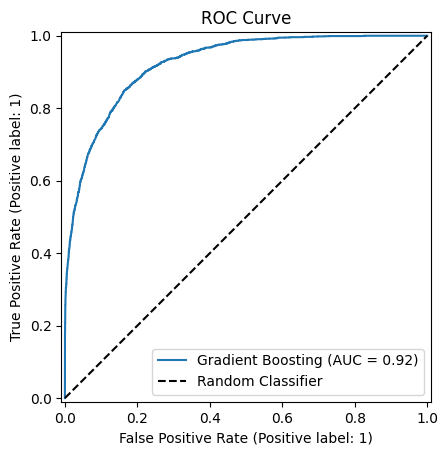

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

print("\nROC Curve:")
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_model, X_test, y_test, name='Gradient Boosting')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal line for reference
plt.legend()
plt.show()



Confusion Matrix:
[[7127  352]
 [ 896 1394]]


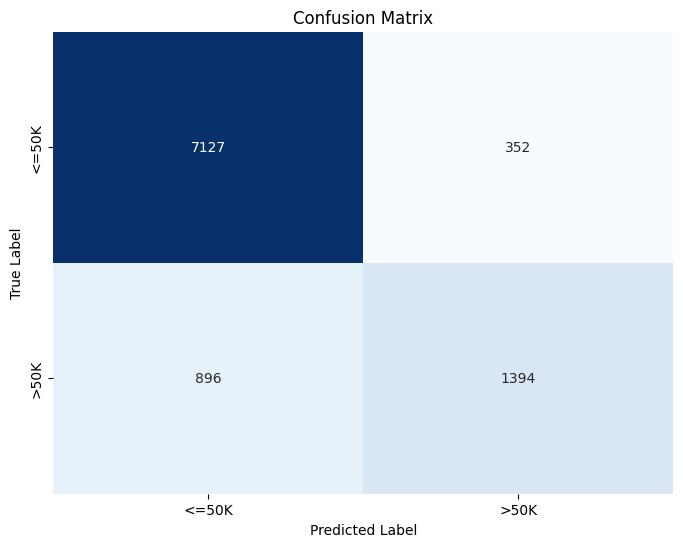

In [12]:
# Confusion Matrix
import seaborn as sns
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Model Serialization and deployment**

###Step 1: Save the Model, Preprocessor, and Label Encoder
  We will use the joblib library to save our trained model and the data preprocessing objects. This is crucial for deployment.

In [56]:
import joblib

# Save the best model
joblib.dump(best_model, 'salary_prediction_model.joblib')

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

# Save the label encoder
joblib.dump(le, 'label_encoder.joblib')

print("Model, preprocessor, and label encoder have been saved.")

Model, preprocessor, and label encoder have been saved.
